# BUSINESS OBJECTIVE

In order to produce better automobiles, a UK-based automaker has to develop a forecast model to predict severity using details about the vehicles and the accidents. With the help of this report, we hope to identify the various factors that have been used as attributes, such as vehicle type, engine size, road surface condition, vehicle manoeuvre, first point of impact, day of the week, weather conditions, vehicle type, etc., that affect the different levels of accident severity seen in the UK in 2019. The goal of this project is to create predictive models that can use a set of important traits which can be used to classify different levels of accident severity such as fatal ,serious and slight . To predict these, various machine learning techniques were applied.

The EDA, removal of outliers,null values, featuring enigneering and feature scaling was done in the group assignment.

In [1]:
# importing various libraries for various purposes such as loading the dataset,plotting graphs etc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [2]:
#loading the training dataset acquired from group assignment
train_set = pd.read_csv("H://BIG data//INDIVIDUAL ASSIGNMENT//trainset.csv")
train_set.head()

,engine_capacity_cc,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,One way street,Roundabout,Single carriageway,...,overtaking,parked,reversing,stopping,turning,front,nearside,no impact,offside,accident_severity
0,0.589525,-0.400334,-0.395847,-0.362695,-0.421568,2.439773,-0.420169,-0.131987,-0.242573,-1.646832,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Slight
1,1.031392,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,2.379996,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Slight
2,0.036743,-0.400334,-0.395847,2.757141,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,-1.047166,-0.36908,-0.201955,-0.402287,Slight
3,0.746951,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Serious
4,-0.301366,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Serious


In [3]:
#dimensions of training dataset
train_set.shape

(89416, 37)

In [4]:
#loading the testing dataset acquired from group assignment
test_set = pd.read_csv("H://BIG data//INDIVIDUAL ASSIGNMENT//testset.csv")
test_set.head()

,engine_capacity_cc,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,One way street,Roundabout,Single carriageway,...,overtaking,parked,reversing,stopping,turning,front,nearside,no impact,offside,accident_severity
0,1.491149,-0.400334,-0.395847,-0.362695,2.372097,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,-1.047166,2.709436,-0.201955,-0.402287,Slight
1,-0.369346,-0.400334,-0.395847,2.757141,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.369080,-0.201955,-0.402287,Slight
2,-0.306733,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,2.379996,-0.131987,-0.242573,0.607226,...,-1.172385,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.369080,-0.201955,-0.402287,Slight
3,0.766630,-0.400334,-0.395847,-0.362695,-0.421568,2.439773,-0.420169,-0.131987,-0.242573,0.607226,...,-1.172385,-0.217475,-0.121083,2.606454,-0.453704,0.954959,-0.369080,-0.201955,-0.402287,Slight
4,0.718328,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,2.379996,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,-1.047166,-0.369080,-0.201955,2.485785,Slight


In [5]:
#dimensions of testing dataset
test_set.shape

(21306, 37)

In [12]:
#checking for null values in train set
train_set.isnull().sum()

engine_capacity_cc       0
Monday                   0
Saturday                 0
Sunday                   0
Thursday                 0
Tuesday                  0
Wednesday                0
One way street           0
Roundabout               0
Single carriageway       0
Slip road                0
Fine no high winds       0
Fog or mist              0
Other                    0
Raining + high winds     0
Raining no high winds    0
Snowing + high winds     0
Snowing no high winds    0
Frost                    0
dry                      0
snow                     0
wet                      0
bus                      0
car                      0
goods vehicle            0
others                   0
moving                   0
overtaking               0
parked                   0
reversing                0
stopping                 0
turning                  0
front                    0
nearside                 0
no impact                0
offside                  0
accident_severity        0
d

In [13]:
#checking for null values in test set
test_set.isnull().sum()

engine_capacity_cc       0
Monday                   0
Saturday                 0
Sunday                   0
Thursday                 0
Tuesday                  0
Wednesday                0
One way street           0
Roundabout               0
Single carriageway       0
Slip road                0
Fine no high winds       0
Fog or mist              0
Other                    0
Raining + high winds     0
Raining no high winds    0
Snowing + high winds     0
Snowing no high winds    0
Frost                    0
dry                      0
snow                     0
wet                      0
bus                      0
car                      0
goods vehicle            0
others                   0
moving                   0
overtaking               0
parked                   0
reversing                0
stopping                 0
turning                  0
front                    0
nearside                 0
no impact                0
offside                  0
accident_severity        0
d

In [6]:
# dropping the target variable from test set and only keeping the predictors
#copying the  target variable in another variable
Xtest = test_set.drop("accident_severity", axis=1)
ytest = test_set["accident_severity"].copy()

In [7]:
# dropping target variable and keeping others
Xtrain = train_set.drop("accident_severity", axis=1)
ytrain = train_set["accident_severity"].copy()

In [8]:
#counts for different category of accident severity
ytrain.value_counts()

Slight     70993
Serious    17015
Fatal       1408
Name: accident_severity, dtype: int64

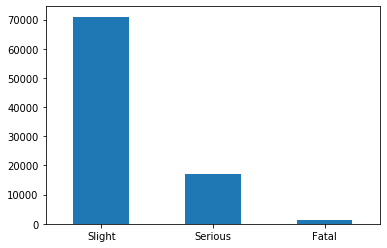

In [9]:
#visualization of different categories of accident severity
ytrain.value_counts().plot(kind="bar", rot=0)

As it can be seen from the plot that the number of slight cases is way more than serious and fatal, hence the data is imbalanced and we balanced the target variable by creating duplicates using oversampling method.

In [10]:
# random oversampling is used for balancing
strategy = {'Slight':70993, 'Serious':50000, 'Fatal':40000}
oversample = RandomOverSampler(sampling_strategy = strategy)

Random oversampling uses the technique by creating duplicates of minority class which is added to the training set, with replacement. Here we have used a ratio of slights having 70993, serious having 50000 and fatal having 40000.

In [11]:
#fitting the oversampled data on to the train set
X_train_resampled, y_train_resampled = oversample.fit_resample(Xtrain,ytrain)

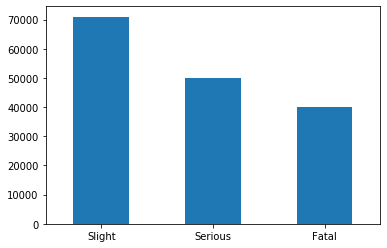

In [12]:
#visualization after oversampling the data
y_train_resampled.value_counts().plot(kind="bar", rot=0)

## BASELINE MODEL

In [13]:
# counts for different categories in accident_severity
train_set['accident_severity'].value_counts()

Slight     70993
Serious    17015
Fatal       1408
Name: accident_severity, dtype: int64

In [14]:
train_set.shape[0]

89416

The output of the baseline classifier will be Slight for all the predictions. We have used macro-averaging.

In [29]:
#storing the number of cases for each category of accident severity in a variable
n_slight = train_set["accident_severity"].value_counts()["Slight"]
n_serious = train_set["accident_severity"].value_counts()["Serious"]
n_fatal = train_set["accident_severity"].value_counts()["Fatal"]
instances = train_set.shape[0]

In [41]:
# The precision,recall,fscore for 'Slight' lable is,
Slight_precision = n_slight/instances
Slight_recall = n_slight/n_slight
Slight_fscore = 2/(1/Slight_precision + 1/Slight_recall)

# The precision,recall,fscore for 'Serious' lable is,
Serious_precision = n_serious/instances
Serious_recall = n_serious/n_serious
Serious_fscore = 2/(1/Serious_precision + 1/Serious_recall)

# The precision,recall,fscore for 'Fatal' lable is,
Fatal_precision = n_fatal/instances
Fatal_recall = n_fatal/n_fatal
Fatal_fscore = 2/(1/Fatal_precision + 1/Fatal_recall)

# the baseline scores are the average of the three classes
p = (Slight_precision+Serious_precision+Fatal_precision)/3
r = (Slight_recall+Serious_recall+Fatal_recall)/3
f = (Slight_fscore+Serious_fscore+Fatal_fscore)/3

print(f"Precision: {p:.5}")
print(f"Recall: {r:.5}")
print(f"F-score: {f:.5}")

Precision: 0.33333
Recall: 1.0
F-score: 0.41196


For the baseline model the the precision, recall and the f-score can be seen and thus can be used to compare with other models.

# DECISION TREE

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=7)

#provide the values of the hyperparameters. In the grid, there will be 3 x 4 =12 combinations
param_grid = {
    'max_depth': [25, 30, 35],
    'min_samples_split': [5, 8, 11, 14]
}

# 5-fold cross-validation has been used
dt_grid_search = GridSearchCV(dtc, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True,verbose=1) 

start = time.time()
dt_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Took 40.67149519920349 seconds


In [19]:
# best hyerparameters for decision tree
best_dtc = dt_grid_search.best_estimator_

In [20]:
#best score achieved for decision tree
dt_grid_search.best_score_

0.3538861722176358

In [21]:
# creating a dataframe to show variations in scores of 
# train and validation set with different hyperparameters
cv_results = pd.DataFrame(dt_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
0,"{'max_depth': 25, 'min_samples_split': 5}",0.611895,0.353886,42.165563
4,"{'max_depth': 30, 'min_samples_split': 5}",0.638047,0.353118,44.656518
8,"{'max_depth': 35, 'min_samples_split': 5}",0.644074,0.352890,45.209763
5,"{'max_depth': 30, 'min_samples_split': 8}",0.578256,0.351966,39.133138
9,"{'max_depth': 35, 'min_samples_split': 8}",0.583025,0.351854,39.650328
1,"{'max_depth': 25, 'min_samples_split': 8}",0.557922,0.351287,37.036559
10,"{'max_depth': 35, 'min_samples_split': 11}",0.541208,0.349404,35.439966
6,"{'max_depth': 30, 'min_samples_split': 11}",0.537470,0.349378,34.995751
2,"{'max_depth': 25, 'min_samples_split': 11}",0.522153,0.348760,33.207225
11,"{'max_depth': 35, 'min_samples_split': 14}",0.511920,0.348122,31.996884


we see that for various combinations of hyperparameters, the train score shows variation but on the validation set there is slight variation. The model is underfitting on all the combinations of hyperparameters.thus, the model is unable to find the underlying trend.The model is performing better on train set than on validation set.hence, we will need to check other models if we can achieve better results.Though model is performing bad but is better than the baseline model. 

In [22]:
# using the best hyperparameters to predict the test set
yhat = best_dtc.predict(Xtest)

# measuring of classification accucary by micro-avering the the presion,recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Decision tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Decision tree:
Precision: 0.71415756795288
Recall: 0.537998505587009
F score: 0.5905195505071633


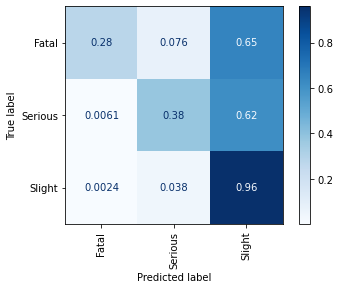

In [23]:
# confusion matrix on the test data
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, yhat, labels=best_dtc.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

from the confusion matrix, the model has classified fatal as fatal for 83% of true instances ,for serious class that model has classified serious for 86% of true instances and for slight it has classified 90% of true instances.

# RANDOM FOREST

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=7)

#provide the values of the hyperparameters. In the grid, there will be 3x3x3=27 combinations
param_grid = {
    'n_estimators': [ 200, 500,800],
    'max_depth': [30, 35,40],
    'min_samples_split': [9,11, 14]
}

# 5-fold cross-validation has been used
rf_grid_search = GridSearchCV(rf, param_grid, cv=3,
                           scoring='f1_macro', 
                           return_train_score=True,verbose=1) 

start = time.time()
rf_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Took 3175.679929971695 seconds


In [86]:
best_rf = rf_grid_search.best_estimator_

In [88]:
rf_grid_search.best_score_

0.32824726969507956

In [89]:
cv_results = pd.DataFrame(rf_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
1,"{'max_depth': 30, 'min_samples_split': 9, 'n_estimators': 500}",0.416586,0.328247,21.205488
9,"{'max_depth': 35, 'min_samples_split': 9, 'n_estimators': 200}",0.424315,0.328165,22.660183
18,"{'max_depth': 40, 'min_samples_split': 9, 'n_estimators': 200}",0.426501,0.327964,23.103505
11,"{'max_depth': 35, 'min_samples_split': 9, 'n_estimators': 800}",0.424018,0.327920,22.663825
10,"{'max_depth': 35, 'min_samples_split': 9, 'n_estimators': 500}",0.424767,0.327876,22.810513
2,"{'max_depth': 30, 'min_samples_split': 9, 'n_estimators': 800}",0.417092,0.327625,21.450090
19,"{'max_depth': 40, 'min_samples_split': 9, 'n_estimators': 500}",0.425157,0.327581,22.950628
20,"{'max_depth': 40, 'min_samples_split': 9, 'n_estimators': 800}",0.425532,0.327567,23.021727
0,"{'max_depth': 30, 'min_samples_split': 9, 'n_estimators': 200}",0.416244,0.327419,21.339636
21,"{'max_depth': 40, 'min_samples_split': 11, 'n_estimators': 200}",0.401795,0.326405,18.763307


for various combination of hyperparameters of random forest, the model is underfitting.the scores on train and validation set is very low. thus the model here alsois unable to identify the underlying pattern.

In [90]:
yhat1 = best_rf.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat1, average="macro")
print("Decision tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Decision tree:
Precision: 0.44418240645040763
Recall: 0.3445306451394358
F score: 0.3278509764045873


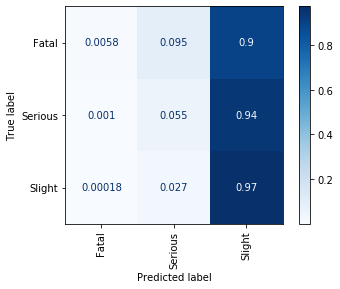

In [91]:
ConfusionMatrixDisplay.from_predictions(ytest, yhat1, labels=best_rf.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

# K NEIGHBOUR CLASSIFIER

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

#provide the values of the hyperparameters. In the grid, there will be 6 combinations
param_grid = {
    'n_neighbors' : [3,5,8,10,12,14]
}

# 5-fold cross-validation has been used
knc_grid_search = GridSearchCV(knc, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True,verbose=1) 

start = time.time()
knc_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Took 3368.002560377121 seconds


In [93]:
best_knc = knc_grid_search.best_estimator_

In [94]:
knc_grid_search.best_score_

0.35625887963615327

In [95]:
cv_results = pd.DataFrame(knc_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
0,{'n_neighbors': 3},0.513298,0.356259,30.594134
1,{'n_neighbors': 5},0.427911,0.349512,18.321401
2,{'n_neighbors': 8},0.393532,0.345470,12.212985
3,{'n_neighbors': 10},0.368186,0.337874,8.232795
4,{'n_neighbors': 12},0.353972,0.332698,6.010216
5,{'n_neighbors': 14},0.343472,0.328277,4.423760


In [96]:
yhat2 = best_knc.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat2, average="macro")
print("Decision tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Decision tree:
Precision: 0.3676789292656837
Recall: 0.35902030005152613
F score: 0.35608181802517347


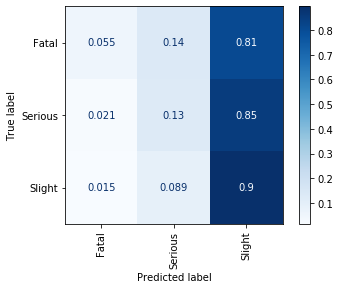

In [97]:
ConfusionMatrixDisplay.from_predictions(ytest, yhat2, labels=best_knc.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

# SUPPORT VECTOR MACHINE

In [19]:
from sklearn.svm import SVC

svm = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
# 5 combinations in the grid
param_grid = {
    'C': [ 0.01, 0.1, 1, 10],
    'gamma': ["auto", 0.1],
}

# we'll use 5-fold cross-validation
svm_grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', return_train_score=True,verbose=1) 

start = time.time()
svm_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")
print(f"Took {end} seconds")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Took 125562.55700993538 seconds
Took 125562.55700993538 seconds


In [20]:
best_svm = svm_grid_search.best_estimator_

In [21]:
svm_grid_search.best_score_

0.3320579475275768

In [22]:
cv_results = pd.DataFrame(svm_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
7,"{'C': 10, 'gamma': 0.1}",0.408867,0.332058,1.878579e+01
5,"{'C': 1, 'gamma': 0.1}",0.336575,0.318793,5.283361e+00
6,"{'C': 10, 'gamma': 'auto'}",0.354517,0.318369,1.019660e+01
4,"{'C': 1, 'gamma': 'auto'}",0.305470,0.304114,4.440746e-01
3,"{'C': 0.1, 'gamma': 0.1}",0.302627,0.302336,9.619269e-02
0,"{'C': 0.01, 'gamma': 'auto'}",0.295050,0.295050,1.485152e-08
1,"{'C': 0.01, 'gamma': 0.1}",0.295050,0.295050,1.485152e-08
2,"{'C': 0.1, 'gamma': 'auto'}",0.295050,0.295050,1.485152e-08


In [23]:
yhat3= best_svm.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat3, average="macro")
print("Decision tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Decision tree:
Precision: 0.8311983064774527
Recall: 0.38853815487862203
F score: 0.40047113198340584


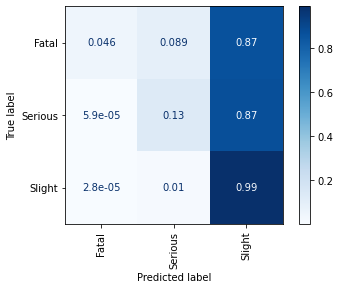

In [24]:
ConfusionMatrixDisplay.from_predictions(ytest, yhat3, labels=best_svm.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

# XG BOOST

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softprob',
                                nthread=4,seed=42)

# specify the hyperparameters and their values
# 5 combinations in the grid
param_grid = {
    'max_depth':  (2, 10),
    'n_estimators': (60, 220, 40),
    'learning_rate': [0.1, 0.05]
}

# we'll use 5-fold cross-validation
xgb_grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_macro', 
                               return_train_score=True,verbose=1) 

start = time.time()
xgb_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")
print(f"Took {end} seconds")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Took 6123.209990978241 seconds
Took 6123.209990978241 seconds


In [14]:
best_xgb = xgb_grid_search.best_estimator_

In [15]:
xgb_grid_search.best_score_

0.3269753306807723

In [16]:
cv_results = pd.DataFrame(xgb_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
4,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 220}",0.425224,0.326975,2.310514e+01
10,"{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 220}",0.375047,0.323533,1.373527e+01
3,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 60}",0.352420,0.322597,8.462161e+00
11,"{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 40}",0.339035,0.321718,5.107823e+00
9,"{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 60}",0.341507,0.321493,5.860680e+00
5,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 40}",0.345345,0.321466,6.914494e+00
1,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 220}",0.302064,0.301391,2.229130e-01
7,"{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 220}",0.295902,0.295605,1.002337e-01
0,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}",0.295050,0.295050,1.485152e-08
2,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 40}",0.295050,0.295050,1.485152e-08


In [17]:
yhat4= best_xgb.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat4, average="macro")
print("Decision tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Decision tree:
Precision: 0.8526556992645933
Recall: 0.39053593175613227
F score: 0.40393154984640917


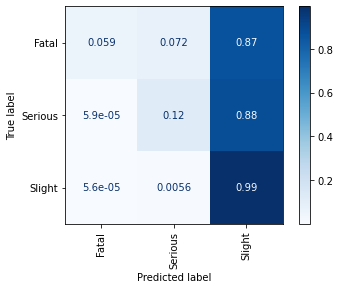

In [18]:
ConfusionMatrixDisplay.from_predictions(ytest, yhat4, labels=best_xgb.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

#  LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state =7, multi_class = 'multinomial', max_iter=10000)

param_grid = {
 'penalty':['l1','l2','elasticnet'],
 'solver' :['newton-cg','lbfgs','sag','saga','liblinear']
}

lr_grid_search = GridSearchCV(lr, param_grid, cv=5,scoring='f1_macro',
                                    return_train_score=True,n_jobs=-1,verbose = 1)

start = time.time()
lr_grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")
print(f"Took {end} seconds")

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\210185944\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\210185944\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\210185944\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\210185944\AppData\Roaming\Python\Python37\site-packages\sk

Took 205.02627968788147 seconds
Took 205.02627968788147 seconds


In [22]:
best_lr = lr_grid_search.best_estimator_

In [23]:
lr_grid_search.best_score_

0.2950858315435506

In [24]:
cv_results = pd.DataFrame(lr_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
3,"{'penalty': 'l1', 'solver': 'saga'}",0.295144,0.295086,0.019627
5,"{'penalty': 'l2', 'solver': 'newton-cg'}",0.295144,0.295084,0.020412
6,"{'penalty': 'l2', 'solver': 'lbfgs'}",0.295143,0.295084,0.020215
7,"{'penalty': 'l2', 'solver': 'sag'}",0.295144,0.295084,0.020412
8,"{'penalty': 'l2', 'solver': 'saga'}",0.295144,0.295084,0.020412
0,"{'penalty': 'l1', 'solver': 'newton-cg'}",NaN,NaN,NaN
1,"{'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN
2,"{'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN
4,"{'penalty': 'l1', 'solver': 'liblinear'}",NaN,NaN,NaN
9,"{'penalty': 'l2', 'solver': 'liblinear'}",NaN,NaN,NaN


In [25]:
yhat5= best_lr.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat5, average="macro")
print("Decision tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Decision tree:
Precision: 0.598607525619964
Recall: 0.3334165834165834
F score: 0.29560120332247175


C:\Users\210185944\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


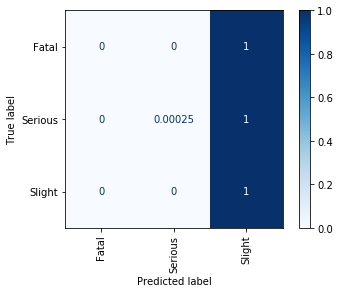

In [19]:
ConfusionMatrixDisplay.from_predictions(ytest, yhat5, labels=best_lr.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

## CONCLUSION

MODEl COMPARISION:

       |        MODEL          |TRAIN F1 SCORE |      TEST F1 SCORE |
        -------------------------------------------------------------------------
       |     Decision tree     |    0.35       |           0.34     |
       |     Random forest     |    0.32       |           0.32     |
       | K-neighbour classifier|    0.35       |           0.35     |
       |          SVM          |    0.33       |           0.40     |
       |        XG boost       |    0.32       |           0.40     |
       |  Logistic regression  |    0.29       |           0.29     |
 
 
It was found that all the models performed poorly or couldn't find the undelying pattern. Logistics regression performed some what similar to the baseline model. Though all the models were better than the baseline model.Some of the combinations of hyperparameters gave Nan results as some of the solvers did not support some of the penalties.

We had started by merging two datasets one of vehicle and the other of accidents which summed up to a total of about 216000 rows and 62 columns.Multiple rows and columns which were not considered in the model was dropped.Outliers were removed, missing values and unknown values were also removed which roughly reduced the data to 50%,still the dataset was big enough.In the end we came down to 110000(total fron both train and test set) records.

Though there were enough data to train and test on several alogorithms we could not achieve a fairly good model. Training the model on the training set was very slow as the dataset was very big.



##  FUTURE IMPROVEMENTS

Since accidents happen everyday we will  we need to keep adding the dataset and retrain the data on new cases and and retest them regularly. We could have included more variables, could have had more realistic data, as there was huge amount of missing and unknown values which had to be dropped that colud have effected the f1-score.
Improvements from the business perspective can also be made, as we saw that from the analysis most of the vehicles involved in the accidents were not only because of human error but changes in the vehicles can also be made such as upgrading to a better breaking system, increasing the turning radius of cars, better and strong windscreens, bringing improvements in tyres which can sustain in different weather and road conditions.